# Stitching images
In this notebook we demonstrate how images can be stitched. Stitching is commonly necessary when images are acquired in [overlapping] tiles. Combining these tiles vertically or horizontally is called stitching.

In [1]:
from skimage.io import imread
import stackview
import matplotlib.pyplot as plt
import pyclesperanto_prototype as cle
import numpy as np

After acquiring the images, you typically know how much the images overlap. Here we assume that the overlap is given as a number of pixels. If you only know the percentage of overlap, you need to compute this number by multiplying the percentage with the image size (width or height).

In [2]:
num_overlap_pixels = 40

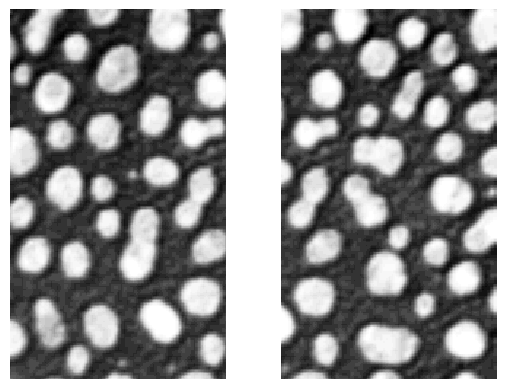

In [3]:
image1 = imread("../../data/blobs_stitching1_overlap40.tif")
image2 = imread("../../data/blobs_stitching2_overlap40.tif")
fig, ax = plt.subplots(1, 2)
stackview.imshow(image1, plot=ax[0])
stackview.imshow(image2, plot=ax[1])

Note that these images contain some overlapping pixels. If we just assemble the images side-by-side, we see these pixels twice.

cl.OCLArray([[ 40.,  32.,  24., ..., 216., 200., 200.],
       [ 56.,  40.,  24., ..., 232., 216., 216.],
       [ 64.,  48.,  24., ..., 240., 232., 232.],
       ...,
       [ 72.,  80.,  80., ...,  48.,  48.,  48.],
       [ 80.,  80.,  80., ...,  48.,  48.,  48.],
       [ 96.,  88.,  80., ...,  48.,  48.,  48.]], dtype=float32)
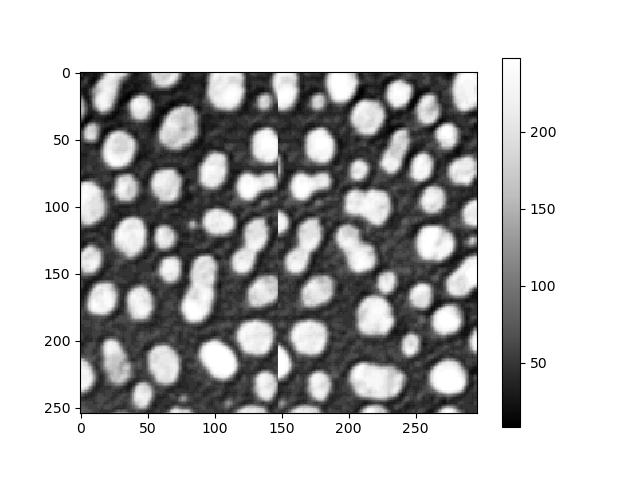
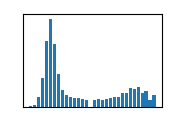

In [4]:
cle.combine_horizontally(image1, image2)

Pyclesperanto allows stitching the images with overlap. The overlapping region will be blended linearly.

cl.OCLArray([[ 40.,  32.,  24., ..., 216., 200., 200.],
       [ 56.,  40.,  24., ..., 232., 216., 216.],
       [ 64.,  48.,  24., ..., 240., 232., 232.],
       ...,
       [ 72.,  80.,  80., ...,  48.,  48.,  48.],
       [ 80.,  80.,  80., ...,  48.,  48.,  48.],
       [ 96.,  88.,  80., ...,  48.,  48.,  48.]], dtype=float32)
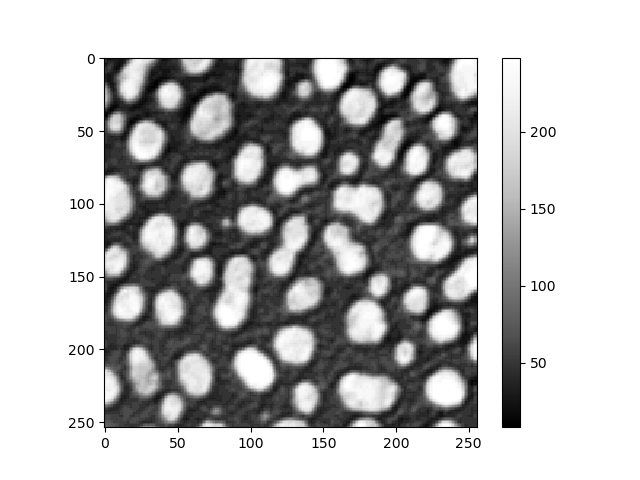
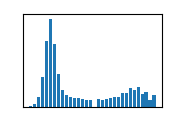

In [5]:
cle.stitch_horizontally_linear_blending(image1, image2, num_pixels_overlap=num_overlap_pixels)

To demonstrate how the linear blending works, we create two synthetic images. First we combine them as shown above.

cl.OCLArray([[1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       ...,
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.]], dtype=float32)
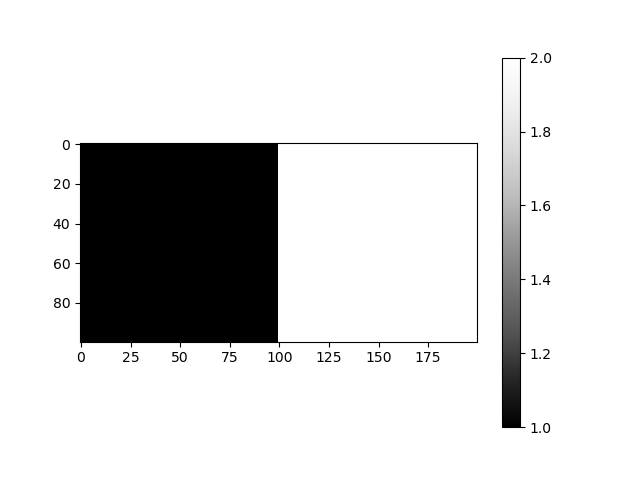
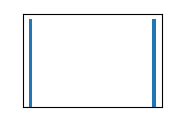

In [6]:
syn_image1 = np.ones((100, 100))
syn_image2 = np.ones((100, 100)) * 2

cle.combine_horizontally(syn_image1, syn_image2)

Then we stitch the images using linear blending.

cl.OCLArray([[1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       ...,
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.]], dtype=float32)
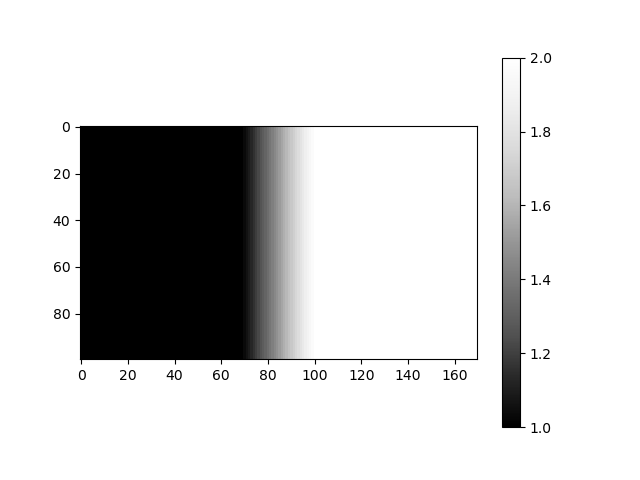
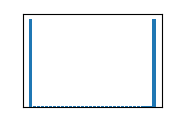

In [7]:
cle.stitch_horizontally_linear_blending(syn_image1, syn_image2, num_pixels_overlap=30)

Note: Computing the registration parameters for optimal overlapping the images is currently not supported in pyclesperanto.